In [1]:
# %matplotlib Qt5

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from siriuspy.devices import DVF

from mathphys import imgproc as images


def create_gauss1d():
    gauss1d, indcs1d = images.FitGaussian.generate_gaussian_1d(
        indcs=1280, sigma=50, mean=600, amplitude=10)
    return gauss1d, indcs1d

def create_gauss1dsat():
    gauss1dsat, indcs1d = images.FitGaussian.generate_gaussian_1d(
        indcs=1024, sigma=50, mean=500, amplitude=300, saturation_threshold=images.FitGaussian.SATURATION_8BITS)
    return gauss1dsat, indcs1d

def create_gauss2d(indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=254, rand_amplitude=0, angle=0, offset=0):
    gauss2d, indcsx2d, indcsy2d = images.FitGaussian.generate_gaussian_2d(
        indcs=indcs, sigma=sigma, mean=mean, amplitude=amplitude, offset=offset, rand_amplitude=rand_amplitude, angle=angle)
    return gauss2d, indcsx2d, indcsy2d

def create_gauss2dsat():
    gauss2dsat, indcsx2d, indcsy2d = images.FitGaussian.generate_gaussian_2d(
        indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=250,
        saturation_threshold=100)
    return gauss2dsat, indcsx2d, indcsy2d

# DVF

In [8]:
dvf = DVF(DVF.DEVICES.CAX_DVF2)

In [9]:
dvf.pvnames

{'CAX:B:BASLER01:Trans1:EnableCallbacks',
 'CAX:B:BASLER01:Trans1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:cam1:Acquire',
 'CAX:B:BASLER01:cam1:AcquirePeriod',
 'CAX:B:BASLER01:cam1:AcquirePeriod_RBV',
 'CAX:B:BASLER01:cam1:AcquireTime',
 'CAX:B:BASLER01:cam1:AcquireTime_RBV',
 'CAX:B:BASLER01:cam1:Acquire_RBV',
 'CAX:B:BASLER01:cam1:ArrayCallbacks',
 'CAX:B:BASLER01:cam1:ArrayCallbacks_RBV',
 'CAX:B:BASLER01:ffmstream1:EnableCallbacks',
 'CAX:B:BASLER01:ffmstream1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:image1:ArrayData',
 'CAX:B:BASLER01:image1:EnableCallbacks',
 'CAX:B:BASLER01:image1:EnableCallbacks_RBV'}

In [10]:
dvf.connected

True

In [12]:
dvf.cmd_acquire_on()

True

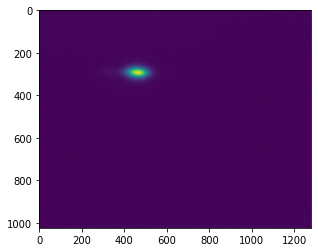

In [5]:
plt.imshow(dvf.image)

In [ ]:
data = dvf.image

# CurveFitGauss

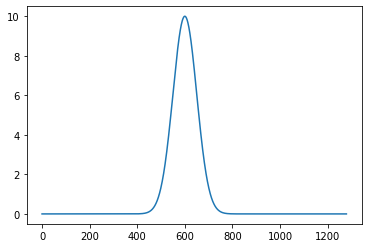

In [4]:
# generate 1D gaussian curve and normalize it

gauss1d, indcs1d = create_gauss1d()
plt.plot(indcs1d, gauss1d)

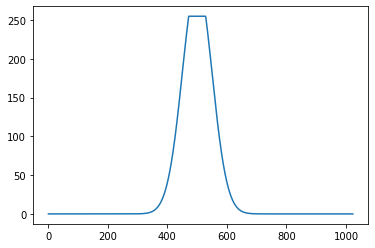

In [7]:
# generate saturated 1D gaussian curve and normalize it

gauss1dsat, indcs1d = create_gauss1dsat()
plt.plot(indcs1d, gauss1dsat)

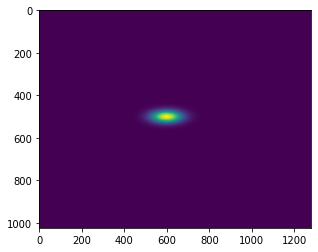

In [8]:
# generate 2D gaussian curve and normalize it

gauss2d, indcsx2d, indcsy2d = create_gauss2d()
plt.imshow(gauss2d)

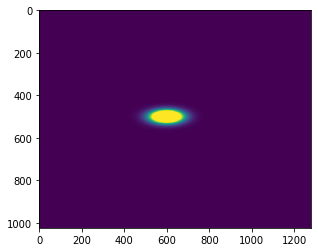

In [9]:
# generate saturated 2D gaussian curve and normalize it

gauss2dsat, indcsx2d, indcsy2d = create_gauss2dsat()
plt.imshow(gauss2dsat)

In [10]:
%timeit gauss1d, indcs1d = images.FitGaussian.generate_gaussian_1d(indcs=1280, sigma=50, mean=500, amplitude=10)

40.1 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%timeit gauss2dsat, indcsx2d, indcsy2d = images.FitGaussian.generate_gaussian_2d(indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=250, saturation_threshold=100)

34.5 ms ± 583 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Image1D

size            : 1280
intensity_min   : 9.005079551673561e-40
intensity_max   : 10.0
intensity_avg   : 0.9791516697777347
intensity_sum   : 1253.3141373155004
saturation_val  : 255
saturated       : False


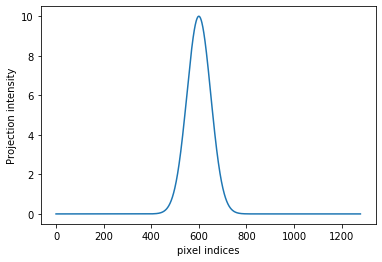

In [13]:
gauss1d, indcs1d = create_gauss1d()

data = gauss1d

img = images.Image1D(data=data)
img.imshow()
print(img)

size            : 1024
intensity_min   : 5.2323186718338715e-22
intensity_max   : 255.0
intensity_avg   : 35.07491375352191
intensity_sum   : 35916.71168360644
saturation_val  : 255
saturated       : True


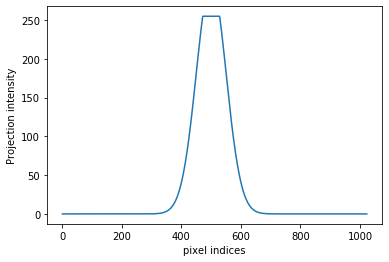

In [14]:
gauss1dsat, indcs1d = create_gauss1dsat()

data = gauss1dsat

img = images.Image1D(data=data)
img.imshow()
print(img)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c60776518>)

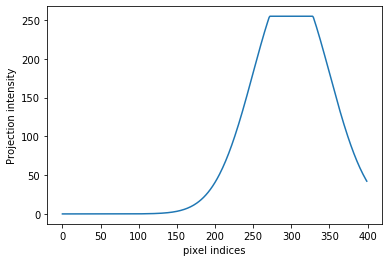

In [15]:
img.imshow(crop=[200,600])

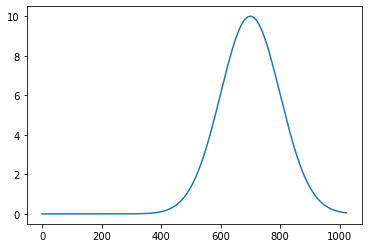

In [16]:
data, indcs = img.generate_gaussian_1d(sigma=100, mean=700, amplitude=10)
plt.plot(indcs, data)

In [17]:
%timeit img = images.Image1D(data=gauss1d)

7.39 µs ± 357 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Image1D_ROI

size            : 1280
intensity_min   : 9.005079551673561e-40
intensity_max   : 10.0
intensity_avg   : 0.9791516697777347
intensity_sum   : 1253.3141373155004
saturation_val  : 255
saturated       : False
roi             : [0, 1280]
roi_center      : 600
roi_fwhm        : 116


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c606d4470>)

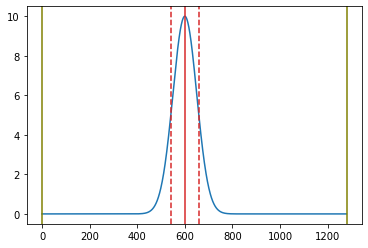

In [18]:
gauss1d, indcs1d = create_gauss1d()

data = gauss1d

img = images.Image1D_ROI(data=data)
print(img)
img.imshow()

size            : 1280
intensity_min   : 9.005079551673561e-40
intensity_max   : 10.0
intensity_avg   : 0.9791516697777347
intensity_sum   : 1253.3141373155004
saturation_val  : 255
saturated       : False
roi             : [484, 716]
roi_center      : 600
roi_fwhm        : 116


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c60635ba8>)

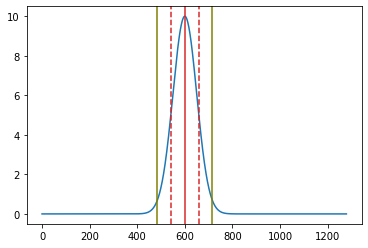

In [19]:
img.update_roi_with_fwhm()
print(img)
img.imshow()

In [20]:
%timeit img = images.Image1D_ROI(data=data)

30.5 µs ± 340 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
%timeit img.create_trimmed()

30 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Image2D

sizey           : 1024
sizex           : 1280
intensity_min   : 7.398643383910336e-187
intensity_max   : 254.0
intensity_avg   : 1.217597250384227
intensity_sum   : 1595929.068023614
saturation_val  : 255
saturated       : False


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c60626b70>)

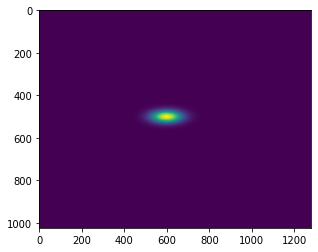

In [22]:
gauss2d, indcsx2d, indcsy2d = create_gauss2d()

# data = dvf.image
data = gauss2d

img = images.Image2D(data=data)
print(img)
img.imshow()

sizey           : 1024
sizex           : 1280
intensity_min   : 7.427771901169825e-187
intensity_max   : 255.0
intensity_avg   : 1.2223909403463704
intensity_sum   : 1602212.2533307946
saturation_val  : 80
saturated       : True


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c601b8898>)

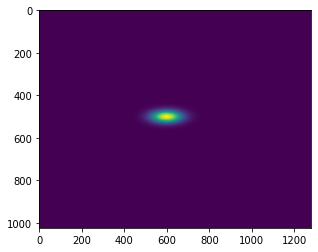

In [32]:
# saturate image for testing 

gauss2dsat, indcsx2d, indcsy2d = create_gauss2(amplitude=255)

data = gauss2dsat

img = images.Image2D(data=gauss2dsat, saturation_threshold=80)
print(img)
img.imshow()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c601312b0>)

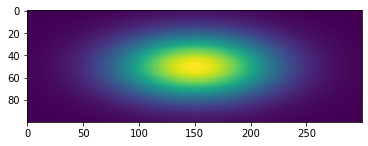

In [33]:
img.imshow(cropx=[450,750], cropy=[450,550])

In [29]:
img.is_saturated

True

In [19]:
%timeit img = images.Image2D(data=data)

478 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
%timeit img.intensity_min

598 µs ± 90.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%timeit img.intensity_sum

377 µs ± 3.19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%timeit img.is_saturated

113 ns ± 0.496 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# Image2D_ROI

sizey           : 1024
sizex           : 1280
intensity_min   : 7.13648672857493e-187
intensity_max   : 245.0
intensity_avg   : 1.1744540407249437
intensity_sum   : 1539380.4002589984
saturation_val  : 255
saturated       : False
--- projx ---
size            : 1280
intensity_min   : 1.1060469639567934e-36
intensity_max   : 12282.478545691894
intensity_avg   : 1202.6409377023424
intensity_sum   : 1539380.4002589982
saturation_val  : 255
saturated       : True
roi             : [0, 1280]
roi_center      : 600
roi_fwhm        : 116
--- projy ---
size            : 1024
intensity_min   : 9.932460514493616e-145
intensity_max   : 30706.196364229756
intensity_avg   : 1503.3011721279283
intensity_sum   : 1539380.4002589986
saturation_val  : 255
saturated       : True
roi             : [0, 1024]
roi_center      : 500
roi_fwhm        : 46


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f893407c2e8>)

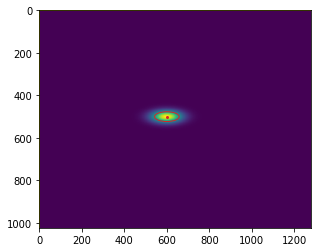

In [5]:
gauss2d, indcsx2d, indcsy2d = create_gauss2d()

# data = dvf.image
data = gauss2d

img = images.Image2D_ROI(data=data)
print(img)
img.imshow()

sizey           : 1024
sizex           : 1280
intensity_min   : 7.13648672857493e-187
intensity_max   : 245.0
intensity_avg   : 1.1744540407249437
intensity_sum   : 1539380.4002589984
saturation_val  : 255
saturated       : False
--- projx ---
size            : 1280
intensity_min   : 1.1060469639567934e-36
intensity_max   : 12282.478545691894
intensity_avg   : 1202.6409377023424
intensity_sum   : 1539380.4002589982
saturation_val  : 255
saturated       : True
roi             : [484, 716]
roi_center      : 600
roi_fwhm        : 116
--- projy ---
size            : 1024
intensity_min   : 9.932460514493616e-145
intensity_max   : 30706.196364229756
intensity_avg   : 1503.3011721279283
intensity_sum   : 1539380.4002589986
saturation_val  : 255
saturated       : True
roi             : [454, 546]
roi_center      : 500
roi_fwhm        : 46


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8933906908>)

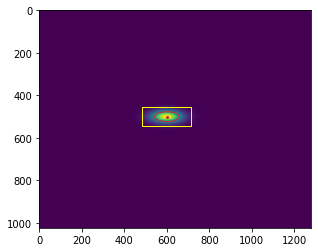

In [10]:
img.update_roi_with_fwhm()
print(img)
img.imshow()

In [7]:
x0, y0 = int(img.imagex.roi_center), int(img.imagey.roi_center)
sx, sy = int(1.0*img.imagex.roi_fwhm), int(1.0*img.imagey.roi_fwhm)
coef = 2.0
roix = [int(x0 - coef*sx), int(x0 + coef*sx)]
roiy = [int(y0 - coef*sy), int(y0 + coef*sy)]
img.roi = [roix, roiy]

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8933339e48>)

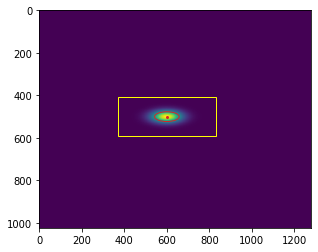

In [8]:
img.imshow()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f89331f4fd0>)

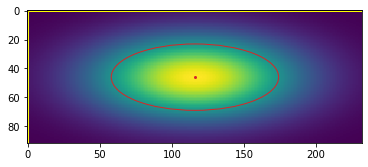

In [11]:
img.imshow(cropx=img.roix, cropy=img.roiy)

In [28]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 7.13648672857493e-187
intensity_max   : 245.0
intensity_avg   : 1.1744540407249437
intensity_sum   : 1539380.4002589984
saturation_val  : 255
saturated       : False
--- projx ---
size            : 1280
intensity_min   : 1.1060469639567934e-36
intensity_max   : 12282.478545691894
intensity_avg   : 1202.6409377023424
intensity_sum   : 1539380.4002589982
saturation_val  : 255
saturated       : True
roi             : [368, 832]
roi_center      : 600
roi_fwhm        : 116
--- projy ---
size            : 1024
intensity_min   : 9.932460514493616e-145
intensity_max   : 30706.196364229756
intensity_avg   : 1503.3011721279283
intensity_sum   : 1539380.4002589986
saturation_val  : 255
saturated       : True
roi             : [408, 592]
roi_center      : 500
roi_fwhm        : 46


In [29]:
%timeit img = images.Image2D_ROI(data)

1.71 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
%timeit img.create_trimmed()

187 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Image2D_CMom

In [26]:
# data = dvf.image
data = create_image(saturation_level=None)
img = image.Image2D_CMom(data)

In [27]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 9.605912733632567e-261
intensity_max   : 255.0
intensity_avg   : 1.2223909403463709
intensity_sum   : 1602212.253330795
saturated       : False
roiy            : [0, 1024]
roix            : [0, 1280]
roiy_center     : 600
roix_center     : 500
roiy_fwhm       : 50
roix_fwhm       : 116
roi_meanx       : 500.0
roi_meany       : 600.0000000000001
roi_sigmax      : 54.57629702699901
roi_sigmay      : 23.79835140981942
roi_angle       : -1.4888835758979924


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d11d95ac8>)

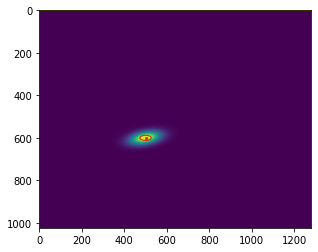

In [5]:
img.imshow()

In [6]:
img.roix = [0, 1000]
img.roiy = [400, 800]

sizey           : 1024
sizex           : 1280
intensity_min   : 9.605912733632567e-261
intensity_max   : 255.0
intensity_avg   : 1.2223909403463709
intensity_sum   : 1602212.253330795
saturated       : False
roiy            : [400, 800]
roix            : [0, 1000]
roiy_center     : 600
roix_center     : 500
roiy_fwhm       : 50
roix_fwhm       : 116
roi_meanx       : 500.00000000000006
roi_meany       : 600.0
roi_sigmax      : 98.79365048279605
roi_sigmay      : 43.07961769713597
roi_angle       : -1.5254750742642278


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d07efea20>)

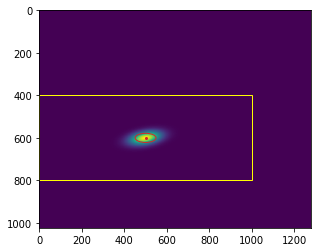

In [7]:
print(img)
img.imshow()

In [10]:
%timeit img._calc_cmom1()

17.6 µs ± 108 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%timeit img.calc_central_moment(2, 0)

9.98 ms ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit img._update_image_roi()

30.8 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Image1D_Fit

size            : 1280
intensity_min   : 2.296295285676758e-38
intensity_max   : 255.0
intensity_avg   : 24.96836757933223
intensity_sum   : 31959.510501545257
saturation_val  : 255
saturated       : True
roi             : [100, 1000]
roi_center      : 600
roi_fwhm        : 116
roi_amplitude   : 255.0000000000015
roi_mean        : 600.0
roi_sigma       : 49.99999999999999
roi_fit_err     : 5.851761284023137e-13 %


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23385f1940>)

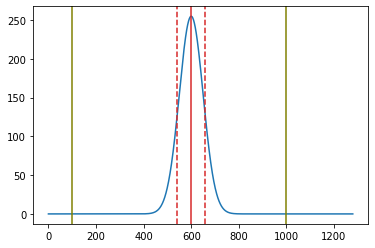

In [2]:
gauss1d, indcs1d = create_gauss1d()

data = gauss1d

img = images.Image1D_Fit(data=data, roi=[100, 1000])
print(img)
img.imshow()

size            : 1280
intensity_min   : 2.296295285676758e-38
intensity_max   : 255.0
intensity_avg   : 24.96836757933223
intensity_sum   : 31959.510501545257
saturation_val  : 255
saturated       : True
roi             : [484, 716]
roi_center      : 600
roi_fwhm        : 116
roi_amplitude   : 255.00000000000082
roi_mean        : 599.9999999999999
roi_sigma       : 49.99999999999985
roi_fit_err     : 3.129801674877096e-13 %


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8fa3a36780>)

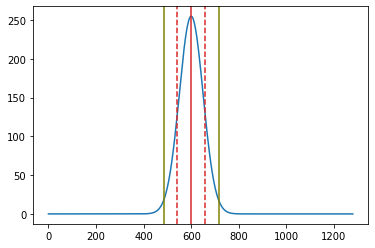

In [3]:
img.update_roi_with_fwhm(fwhm_factor=2)
print(img)
img.imshow()

3.129801674877096e-13


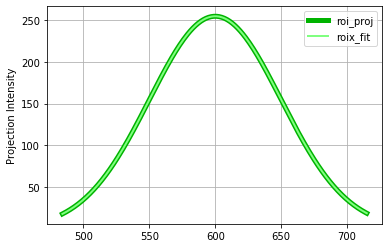

In [5]:
img.plot_projection()
print(img.roi_fit_error)

In [33]:
%timeit img = images.Image1D_Fit(data=data)

586 µs ± 1.56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Image2D_Fit (Scipy fit)

In [1]:
dvf = DVF(DVF.DEVICES.CAX_DVF2)

gauss2d, indcsx2d, indcsy2d = create_gauss2d(amplitude=200, rand_amplitude=0, angle=0)

# data = dvf.image
data = gauss2d

sfg = images.FitGaussianScipy()

img = images.Image2D_Fit(data=data, curve_fit=sfg)
# print(img)
img.imshow()
img.plot_projections()

NameError: name 'DVF' is not defined

# Test angle fitting algorithm

In [5]:
def calc_angle_fit(img, plot=False):
    
    if plot:
        print(img.fity.roi_mean)
        print(img.fity.roi_sigma)

    yn = int(img.fity.roi_mean - 1 * img.fity.roi_sigma )
    y0 = int(img.fity.roi_mean - 0 * img.fity.roi_sigma )
    yp = int(img.fity.roi_mean + 1 * img.fity.roi_sigma )

    datan = img.data[yn,:]
    data0 = img.data[y0,:]
    datap = img.data[yp,:]
    
    if plot:
        plt.plot(datan)
        plt.plot(data0)
        plt.plot(datap)

    fitn = images.Image1D_Fit(data=datan, curve_fit=sfg)
    fit0 = images.Image1D_Fit(data=data0, curve_fit=sfg)
    fitp = images.Image1D_Fit(data=datap, curve_fit=sfg)

    if plot:
        print(fitn.roi_mean, yn)
        print(fit0.roi_mean, y0)
        print(fitp.roi_mean, yp)

    
def calc_angle_roi_orig(img, plot=False):

    if plot:
        print(img.fitx.roi_mean)
        print(img.fitx.roi_sigma)

    xn = int(img.fitx.roi_mean - 3 * img.fitx.roi_sigma )
    x0 = int(img.fitx.roi_mean - 0 * img.fitx.roi_sigma )
    xp = int(img.fitx.roi_mean + 3 * img.fitx.roi_sigma )

    datan = img.data[:, xn]
    data0 = img.data[:, x0]
    datap = img.data[:, xp]

    if plot:
        plt.plot(datan)
        plt.plot(data0)
        plt.plot(datap)

    fitn = images.Image1D_ROI(data=datan)
    fit0 = images.Image1D_ROI(data=data0)
    fitp = images.Image1D_ROI(data=datap)
    yn = fitn.roi_center
    y0 = fit0.roi_center
    yp = fitp.roi_center
    
    if plot:
        print(xn, yn)
        print(x0, y0)
        print(xp, yp)
        
    vx = [xn, x0, xp]
    vy = [yn, y0, yp]
    pfit = np.polyfit(vx, vy, 1)
    angle = - np.arctan(pfit[0]) # sign due to direction of vertical pixel increase
    if plot:
        print('angle: ', angle * 180 / np.pi)
        
def calc_angle_roi(img, plot=False):

    if plot:
        print(img.fitx.roi_mean)
        print(img.fitx.roi_sigma)

    cx, sx = img.fitx.roi_mean, img.fitx.roi_sigma
    vx = np.linspace(cx - 3*sx, cx + 3*sx, 5)
    vx = list(set([int(val) for val in vx]))
    vx = np.sort(vx)
    
    images1droi = [images.Image1D_ROI(data=img.data[:, val]) for val in vx]
    vy = [image.roi_center for image in images1droi]
    
    if plot:
        for image in images1droi:
            plt.plot(image.data)
        plt.show()
    
    if plot:
        for x_, y_ in zip(vx, vy):
            print(x_, y_)
        plt.plot(vx, vy)
        plt.show()
    
    
    pfit = np.polyfit(vx, vy, 1)
    angle = - np.arctan(pfit[0]) # sign due to direction of vertical pixel increase
    if plot:
        print('angle: ', angle * 180 / np.pi)

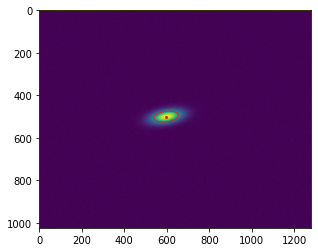

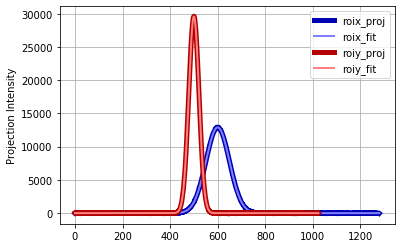

In [7]:
# dvf = DVF(DVF.DEVICES.CAX_DVF2)

gauss2d, *_ = create_gauss2d(
    indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=254,
    rand_amplitude=3, angle=10, offset=0)

# data = dvf.image
data = gauss2d

sfg = images.FitGaussianScipy()

img = images.Image2D_Fit(data=data, curve_fit=sfg, roix=None)
# print(img)
img.imshow()
img.plot_projections()

In [15]:
img.calc_angle_with_roi(sigma_factor=2, nrpts=5)

7.853217577731981

In [3]:
%timeit img = images.Image2D_Fit(data=data, curve_fit=sfg, roix=None)

5.07 ms ± 46.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
%timeit img = images.Image2D_Fit(data=data, curve_fit=sfg, roix=None)

4.91 ms ± 38.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


%timeit img = images.Image2D_Fit(data=data, curve_fit=sfg, roix=None)

In [39]:
img.angle * 180 / np.pi

8.421334354214272

In [5]:
print(img.fitx.roi_sigma, img.fity.roi_sigma)
img.calc_mode_sigmas()

44.44097208657794 30.413812651491096


(38.31490684626918, 20.445832989591906)

453.34428031956986
36.40104609704961


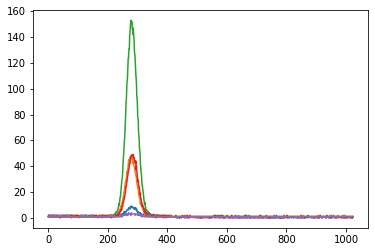

344 276
398 281
453 277
507 281
562 270


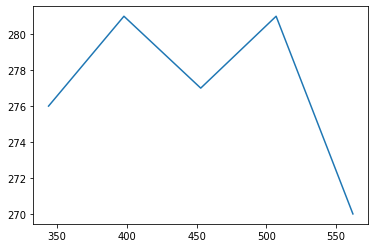

angle:  1.2690540147128428


In [4]:
calc_angle_roi(img, True)

499.98786249578956
25.408100713684583
474 627.2440501822991
499 601.0344917685416
525 573.8940119932314


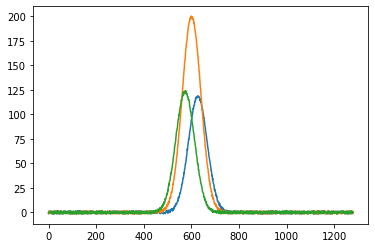

In [52]:
calc_angle_fit(img, True)

In [5]:
%timeit calc_angle_roi(img, False)

360 µs ± 6.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [49]:
%timeit calc_angle_fit(img, False)

5.55 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
img.angle * 180 / np.pi

24.99930746591145

In [4]:
print(img.fitx.roi_sigma, img.fity.roi_sigma)
img.calc_mode_sigmas()

44.440603314243184 30.39997498566898


(42.27642370037162, 33.34411044202376)

In [10]:
func, funs = np.cos(-img.angle), np.sin(-img.angle)
sigmax = img.fitx.roi_sigma
sigmay = img.fity.roi_sigma
sigma1sqr = func**2 * sigmax**2 - funs**2 * sigmay**2
sigma2sqr = -funs**2 * sigmax**2 - func**2 * sigmay**2

In [13]:
funs**2 * sigmax**2

18.652109143039773

In [12]:
funs
print(sigma1sqr)
print(sigma2sqr)

2459.8334815144826
-431.7329598663335


# Image2D_Fit

In [2]:
from mathphys.functions import save_pickle, load_pickle

# save_pickle(data, 'img.pickle')
data = load_pickle('img.pickle')
# plt.imshow(data)

sizey           : 1024
sizex           : 1280
intensity_min   : 0
intensity_max   : 150
intensity_avg   : 1.5044944763183594
intensity_sum   : 1971971
saturation_val  : 255
saturated       : False
--- fitx ---
size            : 1280
intensity_min   : 924
intensity_max   : 7941
intensity_avg   : 1540.60234375
intensity_sum   : 1971971
saturation_val  : 255
saturated       : False
roi             : [0, 1280]
roi_center      : 457
roi_fwhm        : 86
roi_amplitude   : 6847.195298504767
roi_mean        : 455.0121069395333
roi_sigma       : 36.810439522131304
roi_fit_err     : 4.109328855682841 %
roi_amplitude   : 6847.195298504767
roi_mean        : 455.0121069395333
roi_sigma       : 36.810439522131304
roi_fit_err     : 4.109328855682841 %
--- fity ---
size            : 1024
intensity_min   : 1103
intensity_max   : 15102
intensity_avg   : 1925.7529296875
intensity_sum   : 1971971
saturation_val  : 255
saturated       : False
roi             : [0, 1024]
roi_center      : 282
roi_fwhm      

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8e9c684e48>)

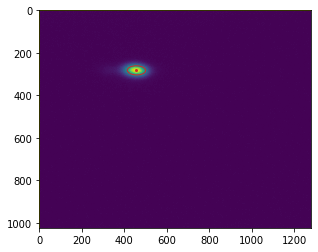

In [3]:
# gauss2d, indcsx2d, indcsy2d = create_gauss2d(rand_amplitude=0)

# data = dvf.image
# data = gauss2d
curve_fit = images.FitGaussianScipy()

# img = images.Image2D_Fit(data=data, roix=[400, 800], roiy=[400, 600])
img = images.Image2D_Fit(data=data, curve_fit=curve_fit, roix=None, roiy=None)
print(img)
img.imshow()

sizey           : 1024
sizex           : 1280
intensity_min   : 7.13648672857493e-187
intensity_max   : 245.0
intensity_avg   : 1.1744540407249437
intensity_sum   : 1539380.4002589984
saturation_val  : 255
saturated       : False
--- fitx ---
size            : 1280
intensity_min   : 1.1060469639567934e-36
intensity_max   : 12282.478545691894
intensity_avg   : 1202.6409377023424
intensity_sum   : 1539380.4002589982
saturation_val  : 255
saturated       : False
roi             : [455, 745]
roi_center      : 600
roi_fwhm        : 116
roi_amplitude   : 12282.478545691905
roi_mean        : 600.0
roi_sigma       : 50.000000000000014
roi_fit_err     : 8.916103585019214e-14 %
roi_amplitude   : 12282.478545691905
roi_mean        : 600.0
roi_sigma       : 50.000000000000014
roi_fit_err     : 8.916103585019214e-14 %
--- fity ---
size            : 1024
intensity_min   : 9.932460514493616e-145
intensity_max   : 30706.196364229756
intensity_avg   : 1503.3011721279283
intensity_sum   : 1539380.400258

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8fa2834198>)

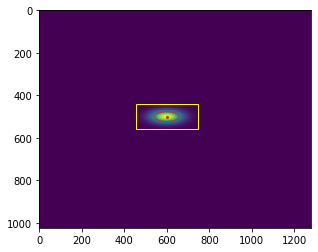

In [10]:
img.update_roi_with_fwhm(fwhmx_factor=2.5, fwhmy_factor=2.5)
print(img)
img.imshow()

8.916103585019214e-14
5.623553357430142e-13


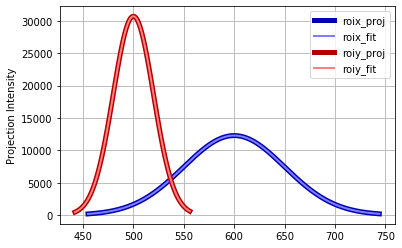

In [11]:
img.plot_projections()
print(img.fitx.roi_fit_error)
print(img.fity.roi_fit_error)

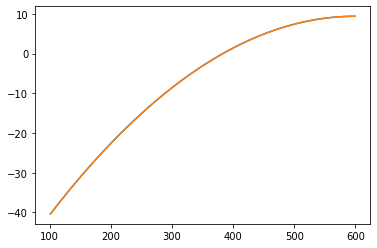

In [30]:
roi = img.fitx.roi  # [400, 800]  # img.roix
sel_roi = (roi[0] < img.fitx.roi_indcs) & (img.fitx.roi_indcs < roi[1])
sel = (img.fitx.roi_proj > 0) & sel_roi
vecx, vecy = img.fitx.roi_indcs[sel], np.log(img.fitx.roi_proj[sel])
pfit = np.polyfit(vecx, vecy, 2)
vecy_fit = np.polyval(pfit, vecx)

plt.plot(vecx, vecy, label='data')
plt.plot(vecx, vecy_fit, label='fit')

In [22]:
np.sum(sel_roi)

0

In [5]:
x0, y0 = int(img.fitx.roi_center), int(img.fity.roi_center)
sx, sy = int(1.0*img.fitx.roi_fwhm), int(1.0*img.fity.roi_fwhm)
coef = 1.0
roix = [int(x0 - coef*sx), int(x0 + coef*sx)]
roiy = [int(y0 - coef*sy), int(y0 + coef*sy)]
img.roi = [roix, roiy]

In [6]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : -0.9625138543409757
intensity_max   : 245.0
intensity_avg   : 1.1710776169446846
intensity_sum   : 1534954.8540817369
saturation_val  : 255
saturated       : False
--- fitx ---
size            : 1280
intensity_min   : -62.37785572471214
intensity_max   : 12284.725462913068
intensity_avg   : 1199.183479751357
intensity_sum   : 1534954.854081737
saturation_val  : 255
saturated       : False
roi             : [483, 715]
roi_center      : 599
roi_fwhm        : 116
roi_amplitude   : 12263.81889935562
roi_mean        : 599.9589677100561
roi_sigma       : 50.469537464893705
roi_fit_err     : 0.4416190068092634 %
roi_amplitude   : 12263.81889935562
roi_mean        : 599.9589677100561
roi_sigma       : 50.469537464893705
roi_fit_err     : 0.4416190068092634 %
--- fity ---
size            : 1024
intensity_min   : -73.25131342521077
intensity_max   : 30625.40948286926
intensity_avg   : 1498.9793496891966
intensity_sum   : 1534954.854

In [7]:
img.roi = [roix, roiy]

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7146feb710>)

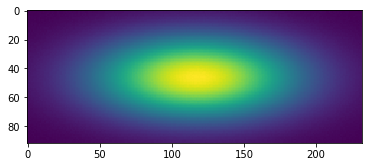

In [8]:
img.imshow(cropx=img.fitx.roi, cropy=img.fity.roi)

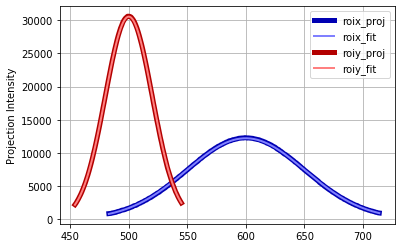

In [9]:
img.plot_projections()

In [11]:
%timeit img = images.Image2D_Fit(data=data)

2.7 ms ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Scipy.curve_fit

In [45]:
from mathphys.functions import save_pickle

save_pickle(dvf.image, 'beam_img_5')

In [14]:
from scipy.optimize import curve_fit


import numpy as np
import matplotlib.pyplot as plt

from siriuspy.devices import DVF

from mathphys import imgproc as images

In [15]:
dvf = DVF(DVF.DEVICES.CAX_DVF2)

In [16]:
sfg = images.ScipyFitGauss(scipy_curv_fit_func=curve_fit)

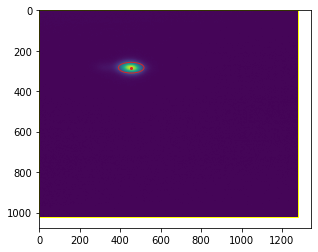

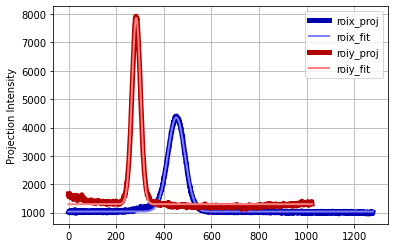

In [17]:
img = images.Image2D_Fit(data=dvf.image, curve_fit=sfg)
# print(img)
img.imshow()
img.plot_projections()

In [5]:
img.fitx.roi

[0, 1280]

In [55]:
class ScipyFitGauss(images.CurveFitGauss):
    """."""

    def __init__(self, scipy_curv_fit_func):
        """."""
        self._scipy_curve_fitfunc = scipy_curv_fit_func
       
    @staticmethod
    def fit_gaussian(x, sigma, mu, amp, offset):
        return offset + amp * np.exp(-0.5*((x - mu)/sigma)**2)
    
    def calc_fit(self, image, proj, indcs, center):
        """."""
        # get roi gaussian fit
        _np = np
        offset = image.intensity_min
        amp = image.intensity_max - image.intensity_min
        mu = image.roi_center
        sigma = image.roi_fwhm / 2.35
        p0 = (sigma, mu, amp, offset)
        param, _ = self._scipy_curve_fitfunc(ScipyFitGauss.fit_gaussian, indcs, proj, p0)
        gfit, *_ = ScipyFitGauss.fit_gaussian(indcs, *param)
        roi_gaussian_fit = gfit
        error = _np.sum((gfit - proj)**2)
        error /= _np.sum(proj**2)
        roi_gaussian_error = 100 * _np.sqrt(error)
        fit = (param, roi_gaussian_fit, roi_gaussian_error)
        return fit

In [56]:
sfg = ScipyFitGauss(scipy_curv_fit_func=curve_fit)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

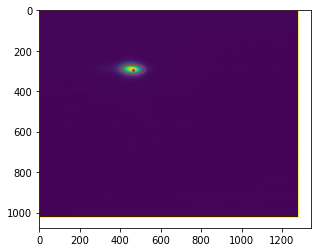

In [42]:
img = images.Image2D_ROI(data=dvf.image)
# print(img)
img.imshow()

In [57]:
image = img.imagex
proj = image.data
indcs = image.roi_indcs
center = image.roi_center

sfg.calc_fit(image, proj, indcs, center)

(array([  35.90524516,  457.89560513, 3629.31907795, 1050.13146941]),
 1050.131469407346,
 53.510900032777265)

In [34]:
def gauss(x, offset, amp, mean, sigma):
    return offset + amp * np.exp(-0.5*((x - mean)/sigma)**2)

In [36]:
p0 = (0, 4000, 450, 35)

In [38]:
x, y = img.imagex.roi_indcs, img.imagex.roi_proj
p, _ = curve_fit(gauss, x, y , p0)
yfit = gauss(x, *p)

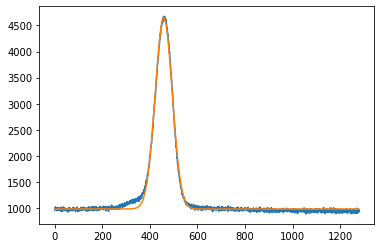

In [39]:
plt.plot(x, y)
plt.plot(x, yfit)
plt.show()

In [71]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 0
intensity_max   : 105
intensity_avg   : 1.2360107421875
intensity_sum   : 1620064
saturated       : False
roiy            : [197, 345]
roix            : [274, 598]
roiy_center     : 272
roix_center     : 436
roiy_fwhm       : 37
roix_fwhm       : 81
roiy_sigma      : 27.54266219650197
roix_sigma      : 62.504422945912005
roiy_mean       : 271.95580204262967
roix_mean       : 429.3134707636719
roiy_amplitude  : 4658.488918410126
roix_amplitude  : 2046.4641107258974
roiy_gauss_err  : 42.51819850708045 %
roix_gauss_err  : 45.52227850679792 %


# Bigaussian fit

In [22]:
# scipy.optimize.least_squares(
#   fun, x0, jac='2-point', bounds=(-inf, inf), method='trf',
#   ftol=1e-08, xtol=1e-08, gtol=1e-08, x_scale=1.0, loss='linear',
#   f_scale=1.0, diff_step=None, tr_solver=None, tr_options={},
#   jac_sparsity=None, max_nfev=None, verbose=0, args=(), kwargs={})

from scipy.optimize import least_squares

In [24]:
angle_model = 5
data, indcsx, indcsy = create_gauss2d(
    indcs=(1280, 1024), sigma=(50, 20), mean=(600,500),
    amplitude=254, rand_amplitude=0, angle=angle_model)

img = images.Image2D_Fit(data=data, roix=[400, 800], roiy=[400, 600])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd8676ac0b8>)

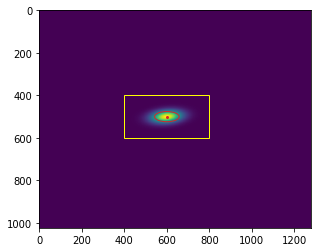

In [25]:
img.imshow()

In [26]:
def func(params):

    sigmax, meanx, sigmay, meany, amplitude, offset, angle = params
    
#     angle = params[0]
#     meanx = img.fitx.roi_mean
#     sigmax = img.fitx.roi_sigma
#     meany = img.fity.roi_mean
#     sigmay = img.fity.roi_sigma
#     amplitude = img.intensity_max - img.intensity_min
#     offset = img.intensity_min

    imgc, indcsx, indcsy = create_gauss2d(
        indcs=(img.data.shape[1], img.data.shape[0]), sigma=(sigmax, sigmay), mean=(meanx, meany), offset=offset,
        amplitude=amplitude, rand_amplitude=3, angle=angle)
    
    roix, roiy = img.fitx.roi, img.fity.roi 
    imgm = img.data[slice(*roiy), slice(*roix)]
    imgc = imgc[slice(*roiy), slice(*roix)]
    
#     imgm = img.data

#     print(imgm.shape)
#     print(imgc.shape)
#     plt.imshow(imgm)
#     plt.imshow(imgc)
    
    res = np.sum((imgm - imgc)**2)
#     print(type(res))
    
    return res

In [27]:
meanx = img.fitx.roi_mean
sigmax = img.fitx.roi_sigma
meany = img.fity.roi_mean
sigmay = img.fity.roi_sigma
amplitude = img.intensity_max - img.intensity_min
offset = img.intensity_min
angle = img.angle

params0 = sigmax, meanx, sigmay, meany, amplitude, offset, angle
# params0 = angle,

In [28]:
func(params0)

155243.74816558542

In [29]:
least_squares(func, params0, max_nfev=30)

 active_mask: array([0., 0., 0., 0., 0., 0., 0.])
        cost: 11907567751.804827
         fun: array([154321.53285789])
        grad: array([4.23682897e+14, 1.15753337e+13, 5.98474203e+14, 1.83950048e+13,
       1.10952508e+14, 1.64810517e+16, 6.12948938e+15])
         jac: array([[2.74545548e+09, 7.50078974e+07, 3.87809913e+09, 1.19199210e+08,
        7.18969710e+08, 1.06796837e+11, 3.97189509e+10]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 16
        njev: 3
  optimality: 1.6481051662425834e+16
      status: 3
     success: True
           x: array([4.98429865e+01, 6.00000079e+02, 2.03960333e+01, 5.00000104e+02,
       2.54000338e+02, 4.42974347e-02, 4.23454130e+00])

In [35]:
angle_model

0.03490658503988659

In [28]:
%timeit least_squares(func, params0)

1.37 s ± 372 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
